In [128]:
#1 Download the dataset here.
from pandas import read_excel
import pandas as pd
import numpy as np


my_sheet = 'estimates' # Sheet Name
file_name = '/users//shelbylabuschagne//PalindromeData//Palindrome.xlsx' # excel file
df = read_excel(file_name, sheet_name = my_sheet, skiprows=1)#skip the top row
df

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789
...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661


In [129]:
#2a
#What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?
df["NoPLHIV"].sum()#total number of people

12887080

In [130]:
#2a
#What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?
dis=(df['District'].unique())#get each district

#sum the dno. by the districts
for dists in dis:
    total = df.loc[df['District'] == dists, 'NoPLHIV'].sum()
    print(dists+" "+str(total))

Buffalo City 204130
City of Cape Town 433160
West Coast 28416
Cacadu 75461
Amatole 205667
Chris Hani 227939
Joe Gqabi 78384
O.R. Tambo 327734
Xhariep 24495
Lejweleputswa 231434
Thabo Mofutsanyana 228455
Cape Winelands 75359
Fezile Dabi 96317
Ugu 285293
uMgungundlovu 430979
uThukela 233673
uMzinyathi 186648
Amajuba 163220
Zululand 339401
uMkhanyakude 177393
uThungulu 322523
iLembe 172421
Overberg 37184
Gert Sibande 415124
Nkangala 258084
Ehlanzeni 552283
Mopani 175125
Vhembe 172966
Capricorn 239482
Waterberg 145133
Bojanala Platinum 425631
Ngaka Modiri Molema 227882
Dr Ruth Segomotsi Mompati 103586
Eden 56342
Dr Kenneth Kaunda 202515
Sedibeng 354118
Sisonke 190498
Alfred Nzo 209508
John Taolo Gaetsewe 38769
Sekhukhune 175935
West Rand 155398
Central Karoo 26398
Namakwa 5193
Pixley ka Seme 20371
Siyanda 28232
Frances Baard 88205
Ekurhuleni 904049
eThekwini 1005928
City of Johannesburg 1029628
Mangaung 189196
Nelson Mandela Bay Metro 203772
City of Tshwane 702043


In [131]:
#2b What is the average NoPLHIV of the two estimates used for “Xhariep”?
total = df.loc[df['District'] == "Xhariep", 'NoPLHIV'].mean()#select and apply the mean
print("Xhariep"+" "+str(total))

Xhariep 12247.5


In [132]:
#2c Add a column and populate it with the number of people not living with HIV for each row. 
#noPLHIV/Prevalence

# select two columns
cols=pd.DataFrame(df[['NoPLHIV', 'Prevalence_%']])#select the two columns


df2 = pd.DataFrame({'a':df['NoPLHIV'], 'b':df['Prevalence_%']})#rename them

# do same but attach it to the dataframe
df2['c'] = df2.apply(lambda row: row.a / (row.b/100), axis=1)#do the math
df.insert(9, "Not HIV", df2['c'])#add it
df

##I dont think my maths was right but I was trying to divide NoPLHIV by Prevalence_ to get the answer


,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Not HIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,7.532132e+05
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,7.532099e+05
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3.860596e+06
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3.860587e+06
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,4.185926e+05
...,...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,1.109821e+06
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1.174205e+06
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1.174202e+06
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,3.089316e+06


In [133]:
# 2d What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 
contain_values1 = df[df['District'].str.contains('City')]#get city
contain_values2= df[df['District'].str.contains('Metro')]#get metro
tot = contain_values2.append(contain_values1)#add the two together
tot["NoPLHIV"].sum()#sum it

2572733

In [134]:
#3 Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output
df.columns = df.columns.str.replace('[_,%]', '')#remove the characters
df.columns

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'Not HIV'],
      dtype='object')

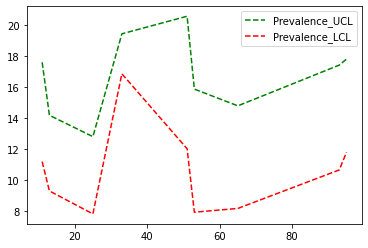

In [144]:
#4 Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) 
#for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 

import matplotlib.pyplot as plt 
contain_values1 = df[df['District'].str.endswith('i')]#get districts ending in i
contain_values1=contain_values1.loc[contain_values1['Estimate'] == "Fay-Heriott"]#select the method


first = contain_values1["PrevalenceUCL"]
second = contain_values1["PrevalenceLCL"]
plt.plot(first, 'g--', second, 'r--')#plot the two values
plt.legend(['Prevalence_UCL', 'Prevalence_LCL'], loc='upper right')#show the legend
plt.show()


In [ ]:
#I think this took about two hours 